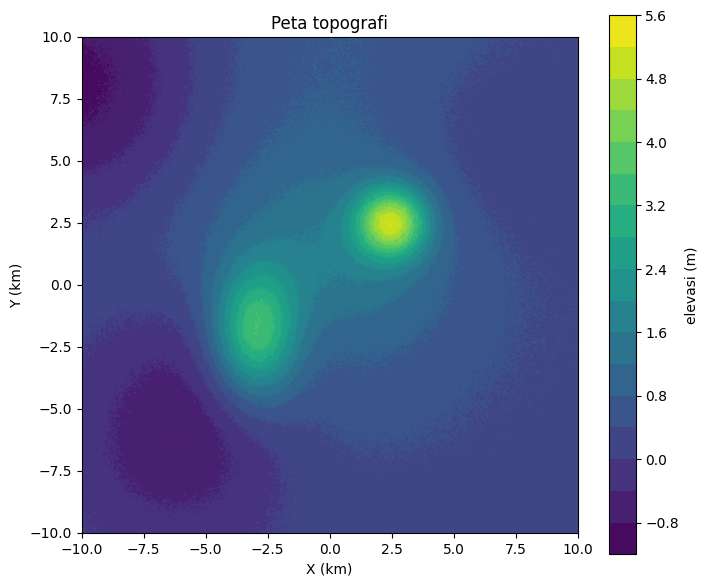

In [150]:
import numpy as np
import matplotlib.pyplot as plt

NPM=10
np.random.seed(NPM)

# grid
nx, ny = 400, 400
x = np.linspace(-10, 10, nx)
y = np.linspace(-10, 10, ny)
X, Y = np.meshgrid(x, y)

# puncak/lembah berdasarkan fungsi eksponen
# x0, y0: posisi
# sx, sy: sebaran lelehan tumpengnya
# amp   : amplitudo
def peak(x0, y0, sx, sy, amp):
    return amp * np.exp(-(((X - x0)**2) / (2*sx**2) + ((Y - y0)**2) / (2*sy**2)))

Z = peak(-3, -2, 1.2, 1.8, 3.2) + peak(2.5, 2.5, 1.0, 1.0, 4) + peak(0, 0, 3.5, 3.5, 1.2) \
    + peak(6, 6, 4, 4, -0.6)  + peak(-10, 8, 3.5, 3.5, -1.2) +  peak(-6, -6, 3, 3, -1.0) \
    + peak(-2, -2, 4, 2, -0.6)  + peak(2.5, 9.5, 6, 6, 0.75)

# exponential decay seperti global slope
Z += 0.5 * np.exp(-(np.sqrt((X/20)**2 + (Y/10)**2)))

# variasi ripple kontur (acak)
Z += 0.05 * np.random.randn(*Z.shape)

# plot
fig, ax = plt.subplots(figsize=(8, 7))
levels = 18  # number of contour levels
cf = ax.contourf(X, Y, Z, levels=levels)
cs = ax.contour(X, Y, Z, levels=levels, linewidths=0.6)
ax.clabel(cs, fmt="%.1f", fontsize=8)
ax.set_title("Peta topografi")
ax.set_xlabel("X (km)")
ax.set_ylabel("Y (km)")
ax.set_aspect('equal', adjustable='box')
plt.colorbar(cf, ax=ax, label="elevasi (m)")

# Bayangkan peta ini adalah topografi bukit di suatu daerah
#
# 1) cari titik tertinggi global  (bobot 10%)
#   gunakan metode optimasi titik maksimum
#
# 2) cari titik aliran 'sungai' menuju titik terendah, asumsikan jika 'hujan' langsung mengalir dan tidak terserap ke tanah (bobot 25%)
#   gunakan metode optimasi titik minimum yang 'bertahap' mengalir atau melompat
#   jalankan beberapa kali untuk melihat agregasi aliran pencarian tsb, visualisasikan
#
# 3) kerawanan erosi ditentukan oleh kecuraman lereng, hitung skor kerawanan di tiap titik (bobot 25%)
#   hitung dengan turunan pertama kontur topologi, boleh gunakan np.gradient()
#   nilai plus yang menggunakan fungsi numerik racikan sendiri untuk turunan parsialnya, yang kemudian dihitung resultannya
#
# 4a) jika tanah hendak diratakan, berapa banyak volume tanah yang harus dipindahkan? (dipotong dari puncak dan diurug ke lembah) (bobot 20+5%)
#   hitung dengan integral untuk sisi atas dan sisi bawah
# 4b) berapa ketinggian akhir tanah yang rata tersebut?
#
# Bonus (15%)
#   pembahasan/diskusi yang kritis atau visualisasi yang ciamik (fancy, padat informasi, tapi tidak menyesatkan)

## No. 1

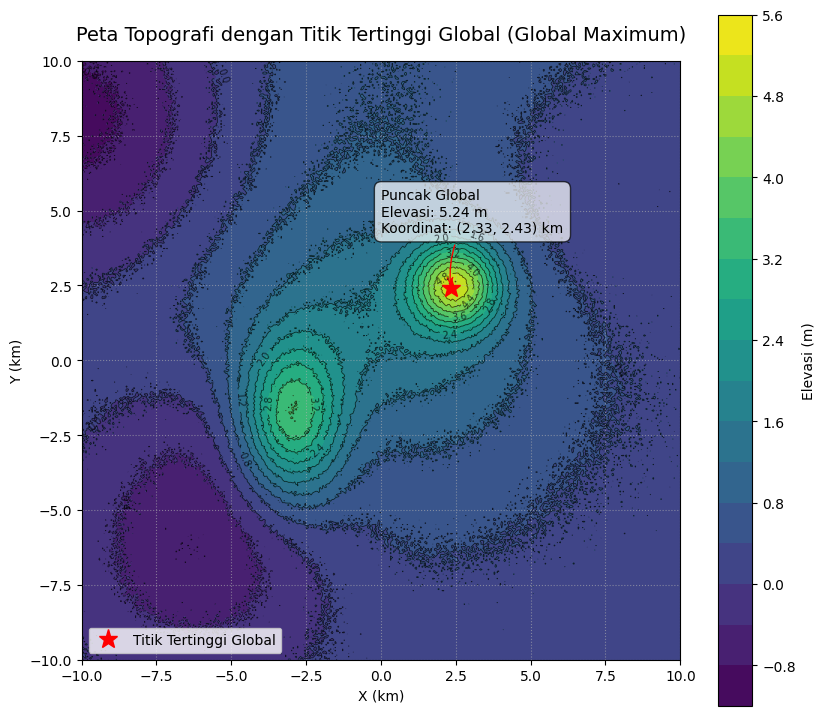

--- Hasil Optimasi Titik Maksimum Global ---
Elevasi Maksimum (Global Maximum): 5.2364 m
Koordinat (X, Y) pada Elevasi Maksimum: (2.3308, 2.4311) km


In [151]:
# 1. Cari Nilai Maksimum Global
Z_max_value = np.max(Z)

# 2. Cari Indeks (Posisi) dari Nilai Maksimum
# np.where mengembalikan tuple dari array indeks (baris, kolom)
max_indices = np.where(Z == Z_max_value)
# Ambil indeks pertama jika ada multiple titik (biasanya hanya satu)
idx_y = max_indices[0][0]
idx_x = max_indices[1][0]

# 3. Petakan Indeks ke Koordinat (X, Y)
X_max = X[idx_y, idx_x]
Y_max = Y[idx_y, idx_x]

# Visualisasi Hasil
fig, ax = plt.subplots(figsize=(8.5, 7.5))
levels = 18

# Plot konturfilled
cf = ax.contourf(X, Y, Z, levels=levels, cmap='viridis')
# Plot garis kontur
cs = ax.contour(X, Y, Z, levels=levels, linewidths=0.6, colors='k', alpha=0.7)
ax.clabel(cs, fmt="%.1f", fontsize=7, colors='k')

# Menandai Titik Tertinggi Global (Maksimum)
ax.plot(X_max, Y_max, 'r*', markersize=14, label='Titik Tertinggi Global')
ax.annotate(
    f"Puncak Global\nElevasi: {Z_max_value:.2f} m\nKoordinat: ({X_max:.2f}, {Y_max:.2f}) km",
    xy=(X_max, Y_max),
    xytext=(-50, 40),
    textcoords='offset points',
    arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=0.2", color='red'),
    fontsize=10,
    bbox=dict(boxstyle="round,pad=0.5", fc="white", alpha=0.7)
)

# Pengaturan Plot
ax.set_title("Peta Topografi dengan Titik Tertinggi Global (Global Maximum)", fontsize=14, pad=15)
ax.set_xlabel("X (km)")
ax.set_ylabel("Y (km)")
ax.set_aspect('equal', adjustable='box')
plt.colorbar(cf, ax=ax, label="Elevasi (m)")
plt.legend(loc='lower left')
plt.grid(linestyle=':', alpha=0.6)
plt.tight_layout()
plt.show()

# Hasil Analisis
print(f"--- Hasil Optimasi Titik Maksimum Global ---")
print(f"Elevasi Maksimum (Global Maximum): {Z_max_value:.4f} m")
print(f"Koordinat (X, Y) pada Elevasi Maksimum: ({X_max:.4f}, {Y_max:.4f}) km")

Untuk mencari titik tertinggi global (maksimum), kita menggunakan inspeksi matriks (Z) untuk menemukan nilai elevasi tertinggi dan memetakan indeksnya kembali ke koordinat (X,Y).

## No. 2

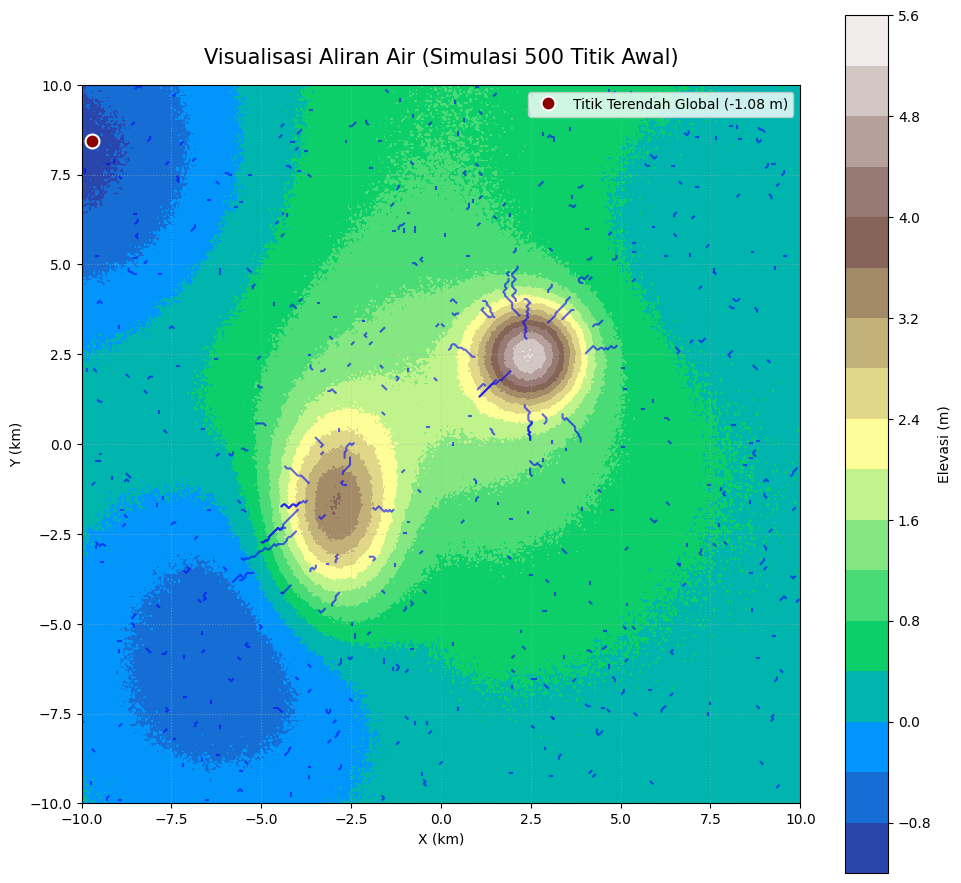

--- Hasil Optimasi Titik Minimum Global ---
Elevasi Minimum (Lokal dan Global Minimum): -1.0773 m
Koordinat (X, Y) pada Elevasi Minimum: (-9.6992, 8.4461) km


In [152]:
# 1. Cari Titik Terendah Global (Global Minimum)
Z_min_value = np.min(Z)
min_indices = np.where(Z == Z_min_value)
Y_min = Y[min_indices[0][0], min_indices[1][0]]
X_min = X[min_indices[0][0], min_indices[1][0]]

# 2. Fungsi Simulasi Aliran (Modified Gradient Descent Step)
def find_flow_path(start_x, start_y, Z, X, Y):
    """Mencari jalur aliran dari (start_x, start_y) ke lokal minimum."""

    # Cari indeks awal di grid
    # Menggunakan np.argmin(np.abs(koordinat - target)) untuk mendapatkan indeks terdekat
    j = np.argmin(np.abs(X[0, :] - start_x))
    i = np.argmin(np.abs(Y[:, 0] - start_y))

    path = []

    while True:
        # Tambahkan koordinat saat ini ke path
        path.append((X[i, j], Y[i, j]))

        current_z = Z[i, j]
        min_z_neighbor = current_z
        next_i, next_j = i, j

        # Cek 8 tetangga (termasuk diagonal)
        # di: perubahan baris (y), dj: perubahan kolom (x)
        for di in [-1, 0, 1]:
            for dj in [-1, 0, 1]:
                if di == 0 and dj == 0:
                    continue # Lewati titik saat ini

                ni, nj = i + di, j + dj

                # Cek batas grid
                if 0 <= ni < Z.shape[0] and 0 <= nj < Z.shape[1]:
                    neighbor_z = Z[ni, nj]

                    # Logika aliran: Pindah ke tetangga dengan elevasi TERENDAH
                    if neighbor_z < min_z_neighbor:
                        min_z_neighbor = neighbor_z
                        next_i, next_j = ni, nj

        # Kondisi berhenti:
        # 1. Jika titik saat ini adalah lokal minimum (min_z_neighbor sama dengan current_z)
        if next_i == i and next_j == j:
            break

        # 2. Jika jalur terlalu panjang (misal, terjebak dalam loop pada area datar/noise)
        if len(path) > 1000:
            break

        # Pindah ke titik berikutnya
        i, j = next_i, next_j

    return path

# 3. Eksekusi Simulasi dari Banyak Titik Awal (Agregasi Aliran)
# Tentukan jumlah titik awal acak
N_START_POINTS = 500

# Hasilkan koordinat awal acak dalam batas grid
np.random.seed(NPM + 1) # Gunakan seed berbeda untuk keacakan aliran
start_x_list = np.random.uniform(X.min(), X.max(), N_START_POINTS)
start_y_list = np.random.uniform(Y.min(), Y.max(), N_START_POINTS)

all_flow_paths = []
for sx, sy in zip(start_x_list, start_y_list):
    path = find_flow_path(sx, sy, Z, X, Y)
    if path:
        all_flow_paths.append(path)

# 4. Visualisasi Hasil Agregasi Aliran
fig, ax = plt.subplots(figsize=(10, 9))
levels = 18

# Plot konturfilled sebagai latar belakang topografi
cf = ax.contourf(X, Y, Z, levels=levels, cmap='terrain')
plt.colorbar(cf, ax=ax, label="Elevasi (m)")

# Plot jalur aliran yang teragregasi
for path in all_flow_paths:
    # Pisahkan koordinat X dan Y dari jalur
    path_x = [p[0] for p in path]
    path_y = [p[1] for p in path]

    # Plot jalur dengan transparansi rendah
    ax.plot(path_x, path_y, color='blue', linewidth=1.5, alpha=0.6)

# Tandai Titik Terendah Global
ax.plot(X_min, Y_min, 'o', color='darkred', markersize=10,
        label=f'Titik Terendah Global ({Z_min_value:.2f} m)', markeredgecolor='white', markeredgewidth=1.5)

# Pengaturan Plot
ax.set_title(f"Visualisasi Aliran Air (Simulasi {N_START_POINTS} Titik Awal)", fontsize=15, pad=15)
ax.set_xlabel("X (km)")
ax.set_ylabel("Y (km)")
ax.set_aspect('equal', adjustable='box')
plt.legend(loc='upper right')
plt.grid(linestyle=':', alpha=0.5)
plt.tight_layout()
plt.show()

# Hasil Analisis Titik Minimum
print(f"--- Hasil Optimasi Titik Minimum Global ---")
print(f"Elevasi Minimum (Lokal dan Global Minimum): {Z_min_value:.4f} m")
print(f"Koordinat (X, Y) pada Elevasi Minimum: ({X_min:.4f}, {Y_min:.4f}) km")

Simulasi jalur aliran air dilakukan menggunakan metode Modified Gradient Descent (Penurunan Gradien) di mana air bergerak ke titik tetangga (dari 8 arah) dengan elevasi terendah. Simulasi dijalankan dari 500 titik awal acak untuk mengagregasi pola aliran.

## Soal 3

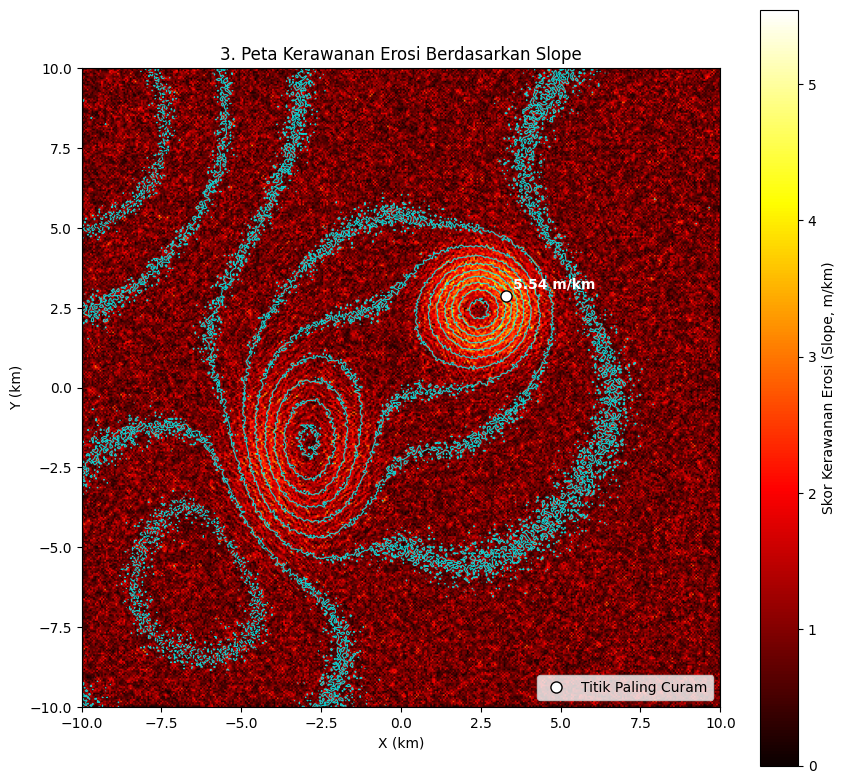

--- Kerawanan Erosi ---
Slope Maksimum (Kerawanan Tertinggi): 5.5433 m/km
Koordinat (X, Y) Titik Paling Curam: (3.2832, 2.8822) km


In [153]:
# 1. Hitung Resolusi Grid
dx = x[1] - x[0]  # Jarak antar titik di sumbu X
dy = y[1] - y[0]  # Jarak antar titik di sumbu Y

# 2. Hitung Turunan Parsial menggunakan Custom Central Difference
# Metode ini memberikan akurasi yang baik pada data grid
dZ_dx_custom = np.zeros_like(Z)
dZ_dy_custom = np.zeros_like(Z)

# dZ/dx (Turunan terhadap X)
# Menggunakan slicing [:, 2:] dan [:, :-2] untuk implementasi beda pusat
dZ_dx_custom[:, 1:-1] = (Z[:, 2:] - Z[:, :-2]) / (2 * dx)

# dZ/dy (Turunan terhadap Y)
# Menggunakan slicing [2:, :] dan [:-2, :]
dZ_dy_custom[1:-1, :] = (Z[2:, :] - Z[:-2, :]) / (2 * dy)

# 3. Hitung Magnitudo Gradien (Slope/Skor Erosi)
# Ini adalah resultan dari turunan parsial
Slope = np.sqrt(dZ_dx_custom**2 + dZ_dy_custom**2)

# 4. Cari Titik Paling Curam (Kerawanan Tertinggi)
Max_Slope_val = np.max(Slope)
Max_Slope_loc = np.where(Slope == Max_Slope_val)
X_steepest = X[Max_Slope_loc[0][0], Max_Slope_loc[1][0]]
Y_steepest = Y[Max_Slope_loc[0][0], Max_Slope_loc[1][0]]

# 5. Visualisasi
fig, ax = plt.subplots(figsize=(9, 8))

# Plot peta Slope (Skor Kerawanan Erosi)
im = ax.imshow(Slope, cmap='hot', origin='lower',
               extent=[X.min(), X.max(), Y.min(), Y.max()])

# Tambahkan garis kontur elevasi asli (Z) untuk referensi
cs = ax.contour(X, Y, Z, levels=12, linewidths=0.8, colors='cyan', alpha=0.8)

# Tandai Titik Paling Curam
ax.plot(X_steepest, Y_steepest, 'wo', markersize=8, markeredgecolor='k', label='Titik Paling Curam')
ax.annotate(
    f"{Max_Slope_val:.2f} m/km", xy=(X_steepest, Y_steepest), xytext=(5, 5),
    textcoords='offset points', fontsize=10, color='white', weight='bold'
)

# Visualisasi
ax.set_title("3. Peta Kerawanan Erosi Berdasarkan Slope")
ax.set_xlabel("X (km)"); ax.set_ylabel("Y (km)")
ax.set_aspect('equal', adjustable='box')
plt.colorbar(im, ax=ax, label="Skor Kerawanan Erosi (Slope, m/km)")
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

print(f"--- Kerawanan Erosi ---")
print(f"Slope Maksimum (Kerawanan Tertinggi): {Max_Slope_val:.4f} m/km")
print(f"Koordinat (X, Y) Titik Paling Curam: ({X_steepest:.4f}, {Y_steepest:.4f}) km")

Kerawanan erosi ditentukan oleh kecuraman lereng (Slope). Slope adalah besaran dari vektor gradien (∇Z), yang dihitung dari turunan parsial elevasi Z terhadap x dan y. Untuk meracik sendiri fungsi numerik, kita menghitung turunan parsial secara numerik menggunakan skema Beda Pusat (Central Difference) sebelum menghitung resultannya.

## No. 4

In [154]:
# SOAL 4b: Hitung Ketinggian Akhir Rata
h_rata = np.mean(Z)

print(f"Ketinggian Akhir Tanah yang Rata (h_rata): {h_rata:.4f} m")

Ketinggian Akhir Tanah yang Rata (h_rata): 0.5014 m


Ketinggian akhir tanah yang rata (h
rata
​
 ) haruslah merupakan elevasi rata-rata dari seluruh area topografi. Hal ini menjamin bahwa total volume tanah yang dipotong (cut) sama persis dengan total volume ruang yang diisi (fill).

In [155]:
# SOAL 4a: Hitung Volume Tanah yang Dipindahkan

# 1. Hitung Resolusi Spasial (Delta Area)
dx = x[1] - x[0]
dy = y[1] - y[0]
dA = dx * dy  # Luas elemen grid (km^2)

# 2. Hitung Matriks Perbedaan (Elevasi relatif terhadap h_rata)
Z_diff = Z - h_rata

# 3. Hitung Volume Potongan (V_cut)
# V_cut adalah volume Z_diff yang bernilai positif (di atas h_rata)
V_cut_grid = np.maximum(0, Z_diff)
V_cut = np.sum(V_cut_grid) * dA

# Total Volume Dipindahkan
V_moved = 2 * V_cut

print(f"Volume Potongan (Cut): {V_cut:.4f} km²⋅m")
print(f"Total Volume Tanah yang Dipindahkan: {V_moved:.4f} km²⋅m")

Volume Potongan (Cut): 109.9460 km²⋅m
Total Volume Tanah yang Dipindahkan: 219.8920 km²⋅m


Volume tanah yang harus dipindahkan (V
moved
​
 ) adalah jumlah volume potongan (V
cut
​
 ) dan volume urugan (V
fill
​
 ). Karena V
cut
​
 =V
fill
​
 , kita cukup menghitung salah satunya dan mengalikannya dengan dua.

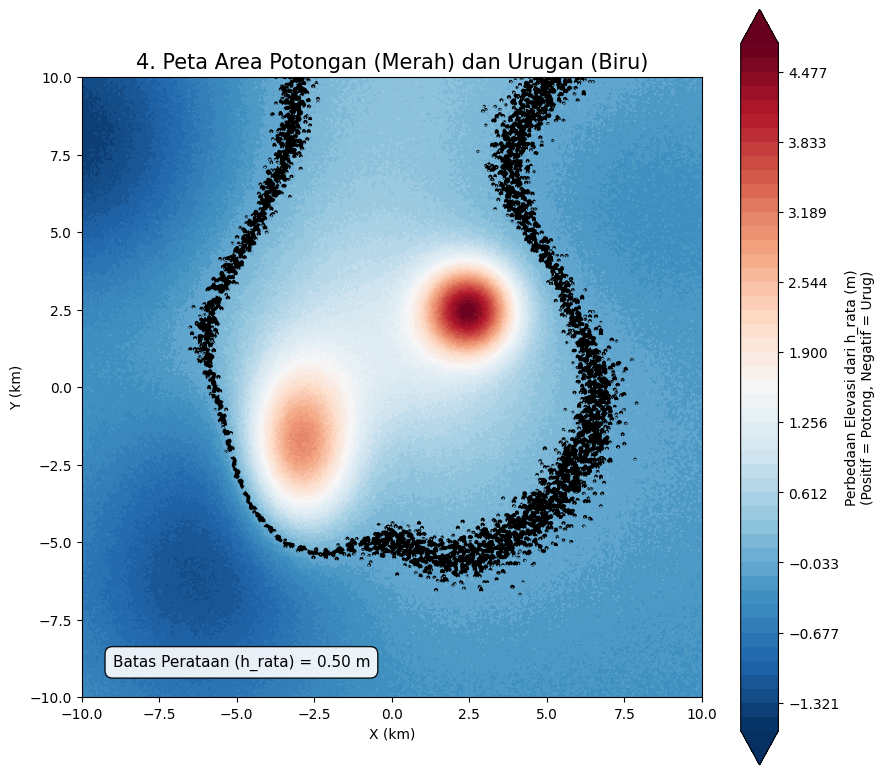

In [156]:
# Visualisasi Area Potongan dan Urugan
fig, ax = plt.subplots(figsize=(9, 8))

# Masukkan matriks Z_diff, di mana nilai positif adalah Cut (Merah), negatif adalah Fill (Biru)
# Gunakan cmap='RdBu_r' untuk memetakan Cut ke Merah dan Fill ke Biru
cf = ax.contourf(X, Y, Z_diff, levels=np.linspace(Z_diff.min(), Z_diff.max(), 50),
                 cmap='RdBu_r', extend='both')

# Garis kontur h_rata (garis batas 0 pada Z_diff)
ax.contour(X, Y, Z_diff, levels=[0], colors='k', linewidths=2.5, linestyles='--')

# Tandai Ketinggian Rata
ax.annotate(
    f"Batas Perataan (h_rata) = {h_rata:.2f} m",
    xy=(-9, -9),
    fontsize=11,
    color='k',
    bbox=dict(boxstyle="round,pad=0.5", fc="white", alpha=0.9)
)

# Pengaturan Plot
ax.set_title("4. Peta Area Potongan (Merah) dan Urugan (Biru)", fontsize=15)
ax.set_xlabel("X (km)"); ax.set_ylabel("Y (km)")
ax.set_aspect('equal', adjustable='box')
plt.colorbar(cf, ax=ax, label="Perbedaan Elevasi dari h_rata (m)\n(Positif = Potong, Negatif = Urug)")
plt.tight_layout()
plt.show()

Visualisasi berikut menunjukkan area mana yang harus dipotong (merah) dan area mana yang harus diurug (biru) relatif terhadap ketinggian rata (h
rata
​
 ).

## visualisasi topografi

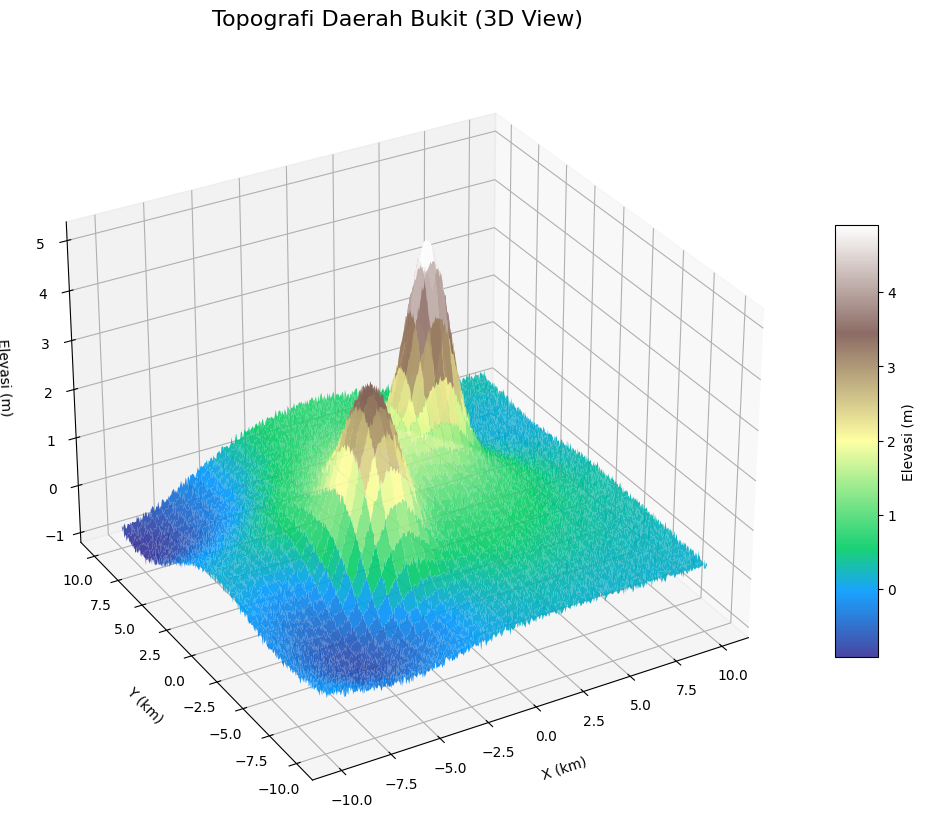

In [157]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # Import modul 3D

NPM = 10
np.random.seed(NPM)

# grid
nx, ny = 400, 400
x = np.linspace(-10, 10, nx)
y = np.linspace(-10, 10, ny)
X, Y = np.meshgrid(x, y)

# puncak/lembah berdasarkan fungsi eksponen
def peak(x0, y0, sx, sy, amp):
    return amp * np.exp(-(((X - x0)**2) / (2*sx**2) + ((Y - y0)**2) / (2*sy**2)))

Z = peak(-3, -2, 1.2, 1.8, 3.2) + peak(2.5, 2.5, 1.0, 1.0, 4) + peak(0, 0, 3.5, 3.5, 1.2) \
    + peak(6, 6, 4, 4, -0.6)  + peak(-10, 8, 3.5, 3.5, -1.2) +  peak(-6, -6, 3, 3, -1.0) \
    + peak(-2, -2, 4, 2, -0.6)  + peak(2.5, 9.5, 6, 6, 0.75)

# exponential decay seperti global slope
Z += 0.5 * np.exp(-(np.sqrt((X/20)**2 + (Y/10)**2)))

# variasi ripple kontur (acak)
Z += 0.05 * np.random.randn(*Z.shape)

# Kode untuk Visualisasi Topografi 3D
fig = plt.figure(figsize=(10, 9))
ax = fig.add_subplot(111, projection='3d') # Membuat subplot 3D

# Plot surface (permukaan) dari topografi
# rstride dan cstride mengatur kerapatan sampel grid untuk plotting (kurangi untuk performa)
# cmap mengatur skema warna
# antialiased=True membuat tepi lebih halus
surf = ax.plot_surface(X, Y, Z, cmap='terrain',
                       rstride=10, cstride=10,
                       linewidth=0.1, antialiased=True, alpha=0.9)

# Pengaturan Judul dan Label Sumbu
ax.set_title("Topografi Daerah Bukit (3D View)", fontsize=16, pad=20)
ax.set_xlabel("X (km)", labelpad=10)
ax.set_ylabel("Y (km)", labelpad=10)
ax.set_zlabel("Elevasi (m)", labelpad=10)

# Menambahkan Color Bar (penting untuk interpretasi elevasi)
fig.colorbar(surf, shrink=0.5, aspect=10, label="Elevasi (m)")

# Mengatur sudut pandang
ax.view_init(elev=30, azim=-120) # elev: elevasi (derajat), azim: azimuth (derajat)

plt.tight_layout()
plt.show()